# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---


## Sujet : Classification Paragraphes


---

# Observations et environnement
---

In [1]:
random_state = 42

In [2]:
cd ../..

/Volumes/Geek/Work/Patat


In [3]:
import importlib
import pandas as pd
import seaborn as sns

## Chargement données

In [4]:
df_corpus = pd.read_csv('data/tmp/230427-CorpusReparse.csv')

In [17]:
df_recueil = pd.read_csv('data/tmp/230426-OIDS-Recueil.csv')

In [6]:
df_corpus

,Unnamed: 0,url,site,title,article,author,date,tags,paragraphs,abstract,date_iso
0,0,https://www.alnas.fr/actualite/en-vrac/les-emi...,www.alnas.fr,Les Émirats arabes unis et l’Arabie saoudite f...,Plus des trois quarts des importations japonai...,Par Sarah -,03/01/2023,['ActualitésEn vrac'],['Plus des trois quarts des importations japon...,NaN,2023-01-03T00:00:00
1,1,https://www.anguillesousroche.com/changement-c...,www.anguillesousroche.com,Article d’opinion du NY Times : « S’accoupler ...,« Nous serons plus nombreux à pouvoir monter d...,NaN,4 janvier 2023,['Changement climatique'],['Un article d’opinion du New York Times suggè...,« Nous serons plus nombreux à pouvoir monter d...,2023-01-04T00:00:00
2,2,https://www.bvoltaire.fr/prediction-pour-2023-...,www.bvoltaire.fr,Prédiction pour 2023 : ça va bien se passer… j...,NaN,Frédéric Lassez,3 janvier 2023,['Articles\nPolitique\nVoeux Macron'],"['Le 31 décembre dernier, Emmanuel Macron étai...",NaN,2023-01-03T00:00:00
3,3,https://lesdeqodeurs.fr/le-premier-ministre-or...,lesdeqodeurs.fr,Le Premier ministre Orbán affirme que le scand...,Article original datant du 16/12/22 par RMX.ne...,NaN,19/12/2022,"['Andrea Cozzolino', 'Bruxelles', 'corruption'...",['Il est temps d’assécher le marécage de Bruxe...,NaN,2022-12-19T00:00:00
4,4,https://lesobservateurs.ch/2022/12/18/herault-...,lesobservateurs.ch,Hérault : 300 musulmans armés de kalachnikovs ...,"« La horde sauvage » nouvelle version, sans la...",Francis Gruzelle,Article publié le 18.12.2022,[],"['« La horde sauvage » nouvelle version, sans ...",NaN,2022-12-18T00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
86822,86822,https://www.lelibrepenseur.org/une-histoire-vi...,www.lelibrepenseur.org,Une histoire vieille comme le monde !,Certains veulent des preuves ! Ils ont raison....,Par\nAdmin,4 mai 2010,['in\nPolitique'],['Certains veulent des preuves ! Ils ont raiso...,NaN,2010-05-04T00:00:00
86823,86823,https://www.lelibrepenseur.org/actus/,www.lelibrepenseur.org,Actus,"Dernière vidéo !\nIl était temps, enfin ! Je v...",Par\nuser,7 juillet 2007,"['in\nÀ la une, Politique']","['Dernière vidéo !', 'Il était temps, enfin ! ...",NaN,2007-07-07T00:00:00
86824,86824,https://www.lelibrepenseur.org/affiche-des-dec...,www.lelibrepenseur.org,Affiche des décès et malaises de sportifs de h...,Un nombre inquiétant de sportifs de haut nivea...,NaN,NaN,[],"['Alors que nous avons des corps athlétiques, ...",NaN,NaN
86825,86825,https://www.lelibrepenseur.org/communaute/,www.lelibrepenseur.org,Communauté,Notre Réseau Telegram et ses Groupes Secondair...,NaN,NaN,[],['Vous devez avoir l’application Telegram pré-...,NaN,NaN


In [18]:
df_recueil

,Unnamed: 0,url,site,title,article,author,date,tags,paragraphs,abstract,...,trop_mots,trop_chiffres,sophisme,inversion_preuve,inverifiable,propos_raportes,sources_citees,titre_decale,denigrement,cherry_picking
0,0,https://www.alnas.fr/actualite/communaute/lara...,www.alnas.fr,L’Arabie saoudite organise des célébrations d'...,L’Arabie saoudite a organisé un événement pour...,Par Youcef -,31/10/2022,['ActualitésCommunauté'],['L’Arabie saoudite a organisé un événement po...,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,https://www.alnas.fr/actualite/en-vrac/quel-ar...,www.alnas.fr,« Quel art ! » : un étudiant en droit invente ...,Une professeure de droit a partagé sur Twitter...,Par Oussama -,19/10/2022,['ActualitésEn vrac'],['Une professeure de droit a partagé sur Twitt...,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,https://www.alnas.fr/actualite/politique/laust...,www.alnas.fr,L’Australie ne reconnaît plus Jérusalem comme ...,Le gouvernement israélien a qualifié la positi...,Par Oussama -,18/10/2022,['ActualitésPolitique'],['Le gouvernement israélien a qualifié la posi...,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,https://www.alnas.fr/actualite/communaute/nant...,www.alnas.fr,Nantes : une mère musulmane meurt poignardée e...,NANTES – Une enquête pour « homicide volontair...,Par Sarah -,17/10/2022,['ActualitésCommunauté'],['NANTES – Une enquête pour «\xa0homicide volo...,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,https://www.alnas.fr/actualite/en-vrac/la-fran...,www.alnas.fr,La France condamnée pour avoir placé un enfant...,La Cour européenne des droits de l’Homme (CEDH...,Par Sarah -,10/11/2022,['ActualitésEn vrac'],['La Cour européenne des droits de l’Homme (CE...,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,588,https://www.wikistrike.com/2022/10/selon-un-an...,www.wikistrike.com,"Selon un ancien conseiller du Pentagone, les É...","Selon un ancien conseiller du Pentagone, les c...",NaN,Publié par wikistrike.com\n ...,[],"['Selon un ancien conseiller du Pentagone, les...",NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
589,589,https://www.wikistrike.com/2022/10/la-pologne-...,www.wikistrike.com,La Pologne s’apprête à s’emparer du territoire...,La Pologne se prépare à s’emparer du territoir...,NaN,Publié par wikistrike.com\n ...,[],['La Pologne se prépare à s’emparer du territo...,NaN,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
590,590,https://www.wikistrike.com/2022/11/exclusivite...,www.wikistrike.com,Exclusivité WikiStrike: un physicien en colère...,"Crise énergétique battant son plein, WikiStri...",NaN,Publié par wikistrike.com\n ...,[],"[""Crise énergétique battant son plein,\xa0\xa0...",NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
591,591,https://www.wikistrike.com/2022/12/zelensky-pa...,www.wikistrike.com,Zelensky parti demander à papa Biden une aide ...,"Alors que des milliers d’Ukrainiens meurent, Z...",NaN,Publié par wikistrike.com\n ...,[],"['Alors que des milliers d’Ukrainiens meurent,...",NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Nettoyage et complétion

In [22]:
df_recueil[['title','article','abstract']] = df_recueil[['title','article','abstract']].fillna(' ')

In [23]:
df_recueil

,Unnamed: 0,url,site,title,article,author,date,tags,paragraphs,abstract,...,trop_mots,trop_chiffres,sophisme,inversion_preuve,inverifiable,propos_raportes,sources_citees,titre_decale,denigrement,cherry_picking
0,0,https://www.alnas.fr/actualite/communaute/lara...,www.alnas.fr,L’Arabie saoudite organise des célébrations d'...,L’Arabie saoudite a organisé un événement pour...,Par Youcef -,31/10/2022,['ActualitésCommunauté'],['L’Arabie saoudite a organisé un événement po...,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,https://www.alnas.fr/actualite/en-vrac/quel-ar...,www.alnas.fr,« Quel art ! » : un étudiant en droit invente ...,Une professeure de droit a partagé sur Twitter...,Par Oussama -,19/10/2022,['ActualitésEn vrac'],['Une professeure de droit a partagé sur Twitt...,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,https://www.alnas.fr/actualite/politique/laust...,www.alnas.fr,L’Australie ne reconnaît plus Jérusalem comme ...,Le gouvernement israélien a qualifié la positi...,Par Oussama -,18/10/2022,['ActualitésPolitique'],['Le gouvernement israélien a qualifié la posi...,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,https://www.alnas.fr/actualite/communaute/nant...,www.alnas.fr,Nantes : une mère musulmane meurt poignardée e...,NANTES – Une enquête pour « homicide volontair...,Par Sarah -,17/10/2022,['ActualitésCommunauté'],['NANTES – Une enquête pour «\xa0homicide volo...,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,https://www.alnas.fr/actualite/en-vrac/la-fran...,www.alnas.fr,La France condamnée pour avoir placé un enfant...,La Cour européenne des droits de l’Homme (CEDH...,Par Sarah -,10/11/2022,['ActualitésEn vrac'],['La Cour européenne des droits de l’Homme (CE...,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,588,https://www.wikistrike.com/2022/10/selon-un-an...,www.wikistrike.com,"Selon un ancien conseiller du Pentagone, les É...","Selon un ancien conseiller du Pentagone, les c...",NaN,Publié par wikistrike.com\n ...,[],"['Selon un ancien conseiller du Pentagone, les...",,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
589,589,https://www.wikistrike.com/2022/10/la-pologne-...,www.wikistrike.com,La Pologne s’apprête à s’emparer du territoire...,La Pologne se prépare à s’emparer du territoir...,NaN,Publié par wikistrike.com\n ...,[],['La Pologne se prépare à s’emparer du territo...,,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
590,590,https://www.wikistrike.com/2022/11/exclusivite...,www.wikistrike.com,Exclusivité WikiStrike: un physicien en colère...,"Crise énergétique battant son plein, WikiStri...",NaN,Publié par wikistrike.com\n ...,[],"[""Crise énergétique battant son plein,\xa0\xa0...",,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
591,591,https://www.wikistrike.com/2022/12/zelensky-pa...,www.wikistrike.com,Zelensky parti demander à papa Biden une aide ...,"Alors que des milliers d’Ukrainiens meurent, Z...",NaN,Publié par wikistrike.com\n ...,[],"['Alors que des milliers d’Ukrainiens meurent,...",,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df_recueil['text'] = df_recueil['title']+'\n'+df_recueil['abstract']+'\n'+df_recueil['article']

In [28]:
df_recueil

,Unnamed: 0,url,site,title,article,author,date,tags,paragraphs,abstract,...,trop_chiffres,sophisme,inversion_preuve,inverifiable,propos_raportes,sources_citees,titre_decale,denigrement,cherry_picking,text
0,0,https://www.alnas.fr/actualite/communaute/lara...,www.alnas.fr,L’Arabie saoudite organise des célébrations d'...,L’Arabie saoudite a organisé un événement pour...,Par Youcef -,31/10/2022,['ActualitésCommunauté'],['L’Arabie saoudite a organisé un événement po...,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,L’Arabie saoudite organise des célébrations d'...
1,1,https://www.alnas.fr/actualite/en-vrac/quel-ar...,www.alnas.fr,« Quel art ! » : un étudiant en droit invente ...,Une professeure de droit a partagé sur Twitter...,Par Oussama -,19/10/2022,['ActualitésEn vrac'],['Une professeure de droit a partagé sur Twitt...,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,« Quel art ! » : un étudiant en droit invente ...
2,2,https://www.alnas.fr/actualite/politique/laust...,www.alnas.fr,L’Australie ne reconnaît plus Jérusalem comme ...,Le gouvernement israélien a qualifié la positi...,Par Oussama -,18/10/2022,['ActualitésPolitique'],['Le gouvernement israélien a qualifié la posi...,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,L’Australie ne reconnaît plus Jérusalem comme ...
3,3,https://www.alnas.fr/actualite/communaute/nant...,www.alnas.fr,Nantes : une mère musulmane meurt poignardée e...,NANTES – Une enquête pour « homicide volontair...,Par Sarah -,17/10/2022,['ActualitésCommunauté'],['NANTES – Une enquête pour «\xa0homicide volo...,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nantes : une mère musulmane meurt poignardée e...
4,4,https://www.alnas.fr/actualite/en-vrac/la-fran...,www.alnas.fr,La France condamnée pour avoir placé un enfant...,La Cour européenne des droits de l’Homme (CEDH...,Par Sarah -,10/11/2022,['ActualitésEn vrac'],['La Cour européenne des droits de l’Homme (CE...,,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,La France condamnée pour avoir placé un enfant...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,588,https://www.wikistrike.com/2022/10/selon-un-an...,www.wikistrike.com,"Selon un ancien conseiller du Pentagone, les É...","Selon un ancien conseiller du Pentagone, les c...",NaN,Publié par wikistrike.com\n ...,[],"['Selon un ancien conseiller du Pentagone, les...",,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,"Selon un ancien conseiller du Pentagone, les É..."
589,589,https://www.wikistrike.com/2022/10/la-pologne-...,www.wikistrike.com,La Pologne s’apprête à s’emparer du territoire...,La Pologne se prépare à s’emparer du territoir...,NaN,Publié par wikistrike.com\n ...,[],['La Pologne se prépare à s’emparer du territo...,,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,La Pologne s’apprête à s’emparer du territoire...
590,590,https://www.wikistrike.com/2022/11/exclusivite...,www.wikistrike.com,Exclusivité WikiStrike: un physicien en colère...,"Crise énergétique battant son plein, WikiStri...",NaN,Publié par wikistrike.com\n ...,[],"[""Crise énergétique battant son plein,\xa0\xa0...",,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Exclusivité WikiStrike: un physicien en colère...
591,591,https://www.wikistrike.com/2022/12/zelensky-pa...,www.wikistrike.com,Zelensky parti demander à papa Biden une aide ...,"Alors que des milliers d’Ukrainiens meurent, Z...",NaN,Publié par wikistrike.com\n ...,[],"['Alors que des milliers d’Ukrainiens meurent,...",,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zelensky parti demander à papa Biden une aide ...


In [52]:
import ast
df_recueil['parag_html']=df_recueil['parag_html'].apply(ast.literal_eval)

In [53]:
def get_parag_text(text):
    return text.split('\n')

In [54]:
df_recueil['text'].isna().sum()

0

In [65]:
df_recueil['parag_text'] = df_recueil['article'].apply(get_parag_text)

In [56]:
df_recueil = df_recueil.rename(columns={'paragraphs':'parag_html'})

In [66]:
df_recueil['pt_count']=df_recueil['parag_text'].apply(len)

In [67]:
df_recueil['ph_count']=df_recueil['parag_html'].apply(len)

In [73]:
ph0 = df_recueil[df_recueil['ph_count']==0].index

In [75]:
df_recueil['paragraphs']=df_recueil['parag_html']

In [76]:
df_recueil['paragraphs'][ph0]=df_recueil['parag_text'][ph0]

/var/folders/fr/mhrqmk5n1xs49b7jl3tgs2r00000gn/T/ipykernel_11370/3724418224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recueil['paragraphs'][ph0]=df_recueil['parag_text'][ph0]


In [77]:
df_recueil['p_count']=df_recueil['paragraphs'].apply(len)

In [ ]:
df_recueil = df_recueil[df_recueil['p_count']<150]

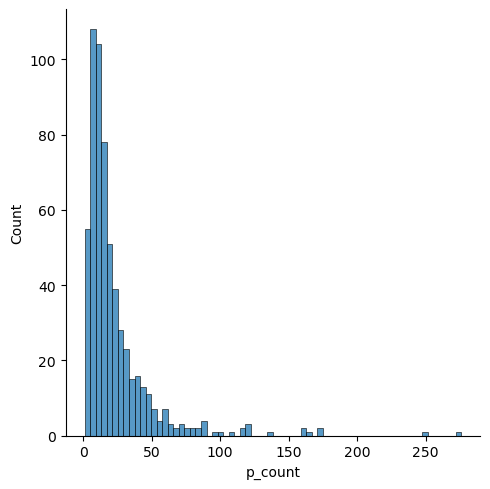

In [78]:
sns.displot(df_recueil,x='p_count')

In [91]:
df_recueil['p_count'].describe()

count    593.000000
mean      23.344013
std       27.718963
min        1.000000
25%        9.000000
50%       15.000000
75%       26.000000
max      276.000000
Name: p_count, dtype: float64

In [82]:
df_recueil['c_count']=df_recueil['article'].apply(len)

In [83]:
df_recueil['p_size']=df_recueil['c_count']/df_recueil['p_count']

In [87]:
df = df_recueil[df_recueil['p_size']<3000]

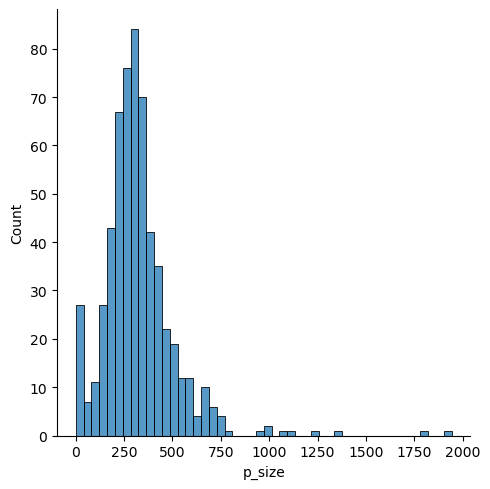

In [88]:
sns.displot(df,x='p_size')

In [90]:
df_recueil[df_recueil['p_size']>500].value_counts('site')

site
www.francesoir.fr             12
www.breizh-info.com            9
www.polemia.com                8
lezarceleurs.blogspot.com      7
www.mondialisation.ca          5
www.dreuz.info                 4
lesmoutonsrebelles.com         4
www.medias-presse.info         4
lesakerfrancophone.fr          3
www.lelibrepenseur.org         3
infodujour.fr                  3
reseauinternational.net        2
lesobservateurs.ch             2
www.nouvelordremondial.cc      2
lesdeqodeurs.fr                2
www.wikistrike.com             2
www.anguillesousroche.com      1
ripostelaique.com              1
www.les-crises.fr              1
www.preuvesduparanormal.fr     1
dtype: int64

# Experience
---

# Mesure et observation des résultats
---

# Sauvegarde
---

# Conclusions
---

- ...

# Bricolages
---